Following the example we walked through in class, and another example on Github (Links to an external site.)Links to an external site., create a jupyter notebook that completes the following steps. Upload the notebook to your github repo and submit the link for credit or post your notebook file. 

Use the following data set to answer the questions for your homework

import pandas as pd 
import matplotlib.pyplot as plt 

# run plots in the notebook 
%matplotlib inline 
url = "http://pbpython.com/extras/sample-salesv2.csv" 
sales = pd.read_csv(url)
Rename the columns to use underscores instead of spaces

Subset the dataframe to contain only the name, category, quantity and unit price columns

Subset the dataframe to contain only shirt sales

Calculate the total cost per shirt sale

Group the shirt sales by company name
Pull out top 10 shirt sales
Graph the top 10 shirt sales
Save the notebook as either a PDF or HTML page
Upload it to your github repo
Post a link to your jupyternote book for credit

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt 

# run plots in the notebook 
%matplotlib inline 
url = "http://pbpython.com/extras/sample-salesv2.csv" 
sales = pd.read_csv(url)

sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [35]:
#change column names to use underscores

sales.columns = ['Account_Number', 'Name', 'SKU', 'Category', 'Quantity', 'Unit_Price', 'Ext_Price', 'Date']
sales.head()

,Account_Number,Name,SKU,Category,Quantity,Unit_Price,Ext_Price,Date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [49]:
#Subset the dataframe to contain only the name, category, quantity and unit price columns
subset = sales[['Name', 'Category', 'Quantity', 'Unit_Price']].copy()
subset.head()

,Name,Category,Quantity,Unit_Price
0,Carroll PLC,Belt,13,44.48
1,Heidenreich-Bosco,Shoes,19,53.62
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16
3,Waters-Walker,Shirt,5,82.68
4,Waelchi-Fahey,Shirt,18,99.64


In [51]:
#Subset the dataframe to contain only shirt sales
shirt_sales = subset[subset['Category'] == "Shirt"].copy()
shirt_sales.head()

,Name,Category,Quantity,Unit_Price
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16
3,Waters-Walker,Shirt,5,82.68
4,Waelchi-Fahey,Shirt,18,99.64
5,"Kerluke, Reilly and Bechtelar",Shirt,17,52.82
9,"Kerluke, Reilly and Bechtelar",Shirt,12,26.98


In [52]:
#Calculate the total cost per shirt sale
#total cost per shirt sale = Quantity * Unit Price
shirt_sales['Total_Cost'] = shirt_sales['Quantity'] * shirt_sales['Unit_Price']
shirt_sales.head()

,Name,Category,Quantity,Unit_Price,Total_Cost
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16,289.92
3,Waters-Walker,Shirt,5,82.68,413.40
4,Waelchi-Fahey,Shirt,18,99.64,1793.52
5,"Kerluke, Reilly and Bechtelar",Shirt,17,52.82,897.94
9,"Kerluke, Reilly and Bechtelar",Shirt,12,26.98,323.76


In [64]:
#Group the shirt sales by company name
name_sales = shirt_sales.groupby('Name').sum()
name_sales.head()

,Quantity,Unit_Price,Total_Cost
Name,,,
Berge LLC,166,1226.54,9670.24
Carroll PLC,257,1098.93,13717.61
Cole-Eichmann,236,1226.75,14528.01
"Davis, Kshlerin and Reilly",161,828.51,7533.03
"Ernser, Cruickshank and Lind",262,1500.25,16944.19


In [65]:
#Pull out top 10 shirt sales
max(shirt_sales['Total_Cost'])

1994.8

In [66]:
#Pull out top 10 shirt sales
top10 = name_sales.sort_values(['Total_Cost'],ascending=[0]).head(10)
top10.head(10)

,Quantity,Unit_Price,Total_Cost
Name,,,
"Kihn, McClure and Denesik",288,1653.58,18956.35
Waters-Walker,288,1603.36,18633.71
"Ernser, Cruickshank and Lind",262,1500.25,16944.19
Hegmann and Sons,278,1528.84,16774.47
Kunze Inc,260,1439.92,15638.87
Cole-Eichmann,236,1226.75,14528.01
Carroll PLC,257,1098.93,13717.61
"Kerluke, Reilly and Bechtelar",269,1038.53,12958.23
"Volkman, Goyette and Lemke",220,1136.25,12791.27


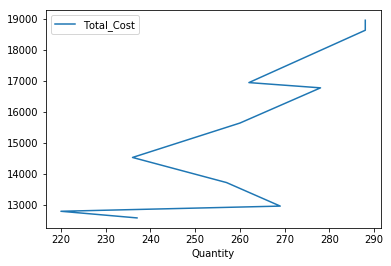

In [67]:
#makeplotz
top10.plot(x = 'Quantity', y = 'Total_Cost')

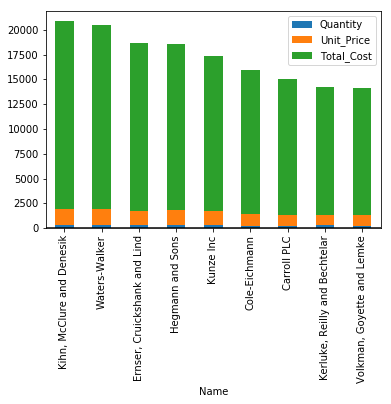

In [68]:
#makeplotz
top10.iloc[:-1].plot.bar(stacked=True); plt.axhline(1, color='k')